## 1. Prepare the Data

### 1) Install additional packages required to run the code

In [32]:
ssc   install reghdfe  , replace
ssc   install ftools   , replace     //needed for reghdfe to work
ssc   install coefplot , replace


checking reghdfe consistency and verifying not already installed...
all files already exist and are up to date.

checking ftools consistency and verifying not already installed...
all files already exist and are up to date.

checking coefplot consistency and verifying not already installed...
all files already exist and are up to date.


### 2) Load data

In [1]:
use "https://raw.githubusercontent.com/worldbank/Stata-IE-Visual-Library/develop/Library/Regression%20coefficients/Treatment%20effect%20on%20multiple%20variables%20by%20gender/data.dta", clear

(Student Standardized Test Scores)


## 2. Estimate Coefficients

### 1) Set up initial locals

In [2]:
local modelList ""
local statSignLevel = 90

### 2) Clear estimates

In [3]:
est clear

### 3) Loop on different subjects

In [4]:
foreach subject in math reading human_sci natural_sci average {
		eststo `subject'_F :  qui reghdfe student_`subject'_std school_treated 	///
						   if student_gender == 0				  				///
						   ,  abs(school_strata) cl(school_id)
		local 	modelsList `" `modelsList' ( `subject'_F, ciopts(recast(rcap) lcolor("132 4 252")) mcolor("132 4 252") msymbol(circle)  )    "'
		eststo `subject'_M :  qui reghdfe student_`subject'_std school_treated 	///
						   if student_gender == 1				  				///
						   ,  abs(school_strata) cl(school_id)
        local 	modelsList `" `modelsList' ( `subject'_M, ciopts(recast(rcap) lcolor("4 196 172")) mcolor("4 196 172") msymbol(diamond) ) || "'
}


## 3. Plot the graph

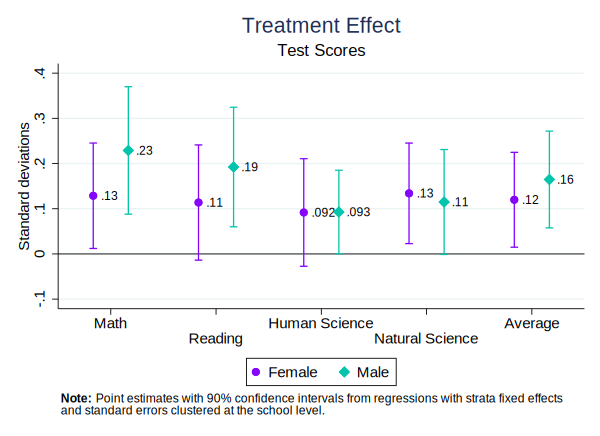

In [5]:
coefplot `modelsList', keep(*school_treated*) vertical bycoefs byopts(yrescale) mlab mlabcolor(black) format(%9.2g) mlabposition(3) mlabgap(1) ///
          levels(`statSignLevel')  ///
          title("Treatment Effect") ///
          subtitle("Test Scores")  ///
          ytitle("Standard deviations") ///
          yline(0, lstyle(foreground))  ///
          yscale(range(-0.1 0.4)) ylab(-0.1(0.1)0.4) ///
          xlab(1 "Math" 2 "Reading" 3 "Human Science" 4 "Natural Science" 5 "Average", alt) ///
          legend(order(2 4) lab(2 "Female") lab(4 "Male")) ///
          note("{bf:Note:} Point estimates with `statSignLevel'% confidence intervals from regressions with strata fixed effects" "and standard errors clustered at the school level.") ///
          graphregion(color(white))


## 4. Store graph in .png format

In [ ]:
qui gr export "figure.png", width(5000) as(png) replace 